In [ ]:
import os
import pathlib


import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np

from functools import lru_cache

import pandas as pd
import plotly as pt
import panel as pn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pd.options.plotting.backend = "plotly"


import warnings
warnings.filterwarnings("ignore")

In [ ]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
current_date = pd.to_datetime("2022-04-01")
print(color.BOLD +  f"Current Date := {current_date}" + color.END)
print(color.BOLD +  f"===================================" + color.END)

Current Date := 2022-04-01 00:00:00


Importing the complete merged dataset

In [ ]:
bond_data = pd.read_parquet(
    "Bond_Pricing_With_Returns_And_Ratings.parquet"
)
print(bond_data.columns)

Index(['ISIN', 'CUSIP', 'Ticker', 'Short_name_of_Issuer', 'Currency',
       'Bid_Price', 'Mid_Price', 'Ask_Price', 'Bid_YTM', 'Mid_YTM', 'Ask_YTM',
       'Bid_Ask_Price_Spread', 'Dirty_Bid_Price', 'Dirty_Mid_Price',
       'Dirty_Ask_Price', 'Bid_Ask_Yield_Spread', 'Bid_Macaulay_Duration',
       'Mid_Macaulay_Duration', 'Bid_Modified_Duration', 'Bid_Convexity',
       'Mid_Convexity', 'Ask_Convexity', 'Mid_Z_Spread',
       'Spread_vs_Benchmark_Bid', 'Spread_vs_Benchmark_Mid',
       'Spread_vs_Benchmark_Ask', 'Tier', 'Coupon_Type', 'Defaulted',
       'Perpetual', 'isCallable', 'Maturity', 'Liquidity_asof', 'id', 'cusip',
       'instrumentRating.directionOfChange', 'instrumentRating.effectiveDate',
       'instrumentRating.endDate', 'instrumentRating.outlook',
       'instrumentRating.provider', 'instrumentRating.rating',
       'instrumentRating.type', 'instrumentRating.watch', 'Previous_Mid_Price',
       'Return'],
      dtype='object')


In [ ]:
bond_data

,ISIN,CUSIP,Ticker,Short_name_of_Issuer,Currency,Bid_Price,Mid_Price,Ask_Price,Bid_YTM,Mid_YTM,...,instrumentRating.directionOfChange,instrumentRating.effectiveDate,instrumentRating.endDate,instrumentRating.outlook,instrumentRating.provider,instrumentRating.rating,instrumentRating.type,instrumentRating.watch,Previous_Mid_Price,Return
0,AU0000002073,D4S475HJ3,KFW,Kred Fuer Wiederaufbau,AUD,101.27922,101.32972,101.38022,1.39587,1.34106,...,New Rating,2018-03-07,None,None,SNP,AAA,Long-Term Foreign Currency,None,102.68527,-0.013201
1,XS2100005771,G3311PAH8,FANTHOL,Fantasia Hldgs Group Co Ltd,USD,14.12656,14.45781,14.78906,556.43932,545.58401,...,Not Rated,2021-12-14,None,None,SNP,NR,Long-Term Foreign Currency,None,23.98490,-0.397212
2,XS2100001192,B3821TPQ2,EIB,Eurpn Invt Bk,NOK,97.79000,97.81500,97.84000,2.53994,2.53086,...,New Rating,2020-02-05,None,None,SNP,AAA,Long-Term Foreign Currency,None,100.66900,-0.028350
3,KZ2C00003051,Y2R48JAH5,EURSA,Eurasian Bk JSC,KZT,85.50855,85.64425,85.78021,15.38859,15.32251,...,Not Rated,2019-10-15,None,None,SNP,NR,Long-Term Kazakhstan National Scale,None,87.42832,-0.020406
4,KZ2C00003002,Y4S4C0AA1,KAZAKS-Bk,Dev Bk of Kazakhstan,KZT,86.17503,86.29733,86.41985,14.41116,14.35008,...,None,2017-05-02,None,None,SNP,NR,Long-Term Local Currency,None,92.32912,-0.065329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29727,CA44889ZBX39,44889ZBX3,QHEL,Hydro Que,CAD,75.91200,76.02661,76.14141,3.18848,3.17075,...,New Rating,2017-07-11,None,None,SNP,AA-,Long-Term Local Currency,None,82.52354,-0.078728
29728,CA44889ZCE49,44889ZCE4,QHEL,Hydro Que,CAD,67.02671,67.16029,67.29416,3.31147,3.29472,...,New Rating,2017-07-11,None,None,SNP,AA-,Long-Term Local Currency,None,74.63534,-0.100154
29729,CA44889ZET99,44889ZET9,QHEL,Hydro Que,CAD,98.35276,98.48908,98.62561,2.82251,2.79231,...,Upgrade,2017-06-16,None,None,SNP,AA-,Long-Term Local Currency,None,105.13957,-0.063254
29730,CA44889ZBU99,44889ZBU9,QHEL,Hydro Que,CAD,80.13028,80.23067,80.33120,3.08934,3.07161,...,New Rating,2017-07-11,None,None,SNP,AA-,Long-Term Local Currency,None,86.39647,-0.071366


In [ ]:
# get isins

isins = bond_data["ISIN"]

print(isins)

0        AU0000002073
1        XS2100005771
2        XS2100001192
3        KZ2C00003051
4        KZ2C00003002
             ...     
29727    CA44889ZBX39
29728    CA44889ZCE49
29729    CA44889ZET99
29730    CA44889ZBU99
29731    CA66989ZEG96
Name: ISIN, Length: 29732, dtype: object


In [ ]:
# get numeric columns only
numeric_columns = bond_data.select_dtypes(include=["number"]).columns
print(numeric_columns)

numeric_bond_data = bond_data[numeric_columns]
numeric_bond_data

# combine with isins
numeric_bond_data = pd.concat([isins, numeric_bond_data], axis=1)
numeric_bond_data

Index(['Bid_Price', 'Mid_Price', 'Ask_Price', 'Bid_YTM', 'Mid_YTM', 'Ask_YTM',
       'Bid_Ask_Price_Spread', 'Dirty_Bid_Price', 'Dirty_Mid_Price',
       'Dirty_Ask_Price', 'Bid_Ask_Yield_Spread', 'Bid_Macaulay_Duration',
       'Mid_Macaulay_Duration', 'Bid_Modified_Duration', 'Bid_Convexity',
       'Mid_Convexity', 'Ask_Convexity', 'Mid_Z_Spread',
       'Spread_vs_Benchmark_Bid', 'Spread_vs_Benchmark_Mid',
       'Spread_vs_Benchmark_Ask', 'Maturity', 'Previous_Mid_Price', 'Return'],
      dtype='object')


,ISIN,Bid_Price,Mid_Price,Ask_Price,Bid_YTM,Mid_YTM,Ask_YTM,Bid_Ask_Price_Spread,Dirty_Bid_Price,Dirty_Mid_Price,...,Bid_Convexity,Mid_Convexity,Ask_Convexity,Mid_Z_Spread,Spread_vs_Benchmark_Bid,Spread_vs_Benchmark_Mid,Spread_vs_Benchmark_Ask,Maturity,Previous_Mid_Price,Return
0,AU0000002073,101.27922,101.32972,101.38022,1.39587,1.34106,1.28629,0.10100,101.50168,101.55218,...,1.34876,1.34950,1.35024,18.81055,31.59785,28.98544,26.37600,340,102.68527,-0.013201
1,XS2100005771,14.12656,14.45781,14.78906,556.43932,545.58401,535.10335,0.66250,16.75469,17.08594,...,0.06949,0.07165,0.07383,26027.20629,55401.51907,54316.41442,53268.77474,283,23.98490,-0.397212
2,XS2100001192,97.79000,97.81500,97.84000,2.53994,2.53086,2.52179,0.05000,97.90027,97.92527,...,10.91304,10.91501,10.91698,-18.84973,6.52663,7.06693,7.60755,1077,100.66900,-0.028350
3,KZ2C00003051,85.50855,85.64425,85.78021,15.38859,15.32251,15.25643,0.27166,86.50855,86.64425,...,7.41820,7.42393,7.42966,196.48291,415.61786,410.61786,405.61786,1061,87.42832,-0.020406
4,KZ2C00003002,86.17503,86.29733,86.41985,14.41116,14.35008,14.28900,0.24482,88.34303,88.46533,...,7.16790,7.17297,7.17805,106.55136,317.87473,313.37473,308.87473,1003,92.32912,-0.065329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29727,CA44889ZBX39,75.91200,76.02661,76.14141,3.18848,3.17075,3.15302,0.22941,75.91200,76.02661,...,1.88461,1.88267,1.88073,23.22863,75.99052,74.49052,72.99052,3212,82.52354,-0.078728
29728,CA44889ZCE49,67.02671,67.16029,67.29416,3.31147,3.29472,3.27798,0.26746,67.02671,67.16029,...,0.77720,0.77594,0.77469,28.98933,83.04627,81.54627,80.04627,4489,74.63534,-0.100154
29729,CA44889ZET99,98.35276,98.48908,98.62561,2.82251,2.79231,2.76211,0.27285,98.58013,98.71645,...,24.37052,24.37933,24.38813,-7.57722,38.86651,36.36651,33.86651,1796,105.13957,-0.063254
29730,CA44889ZBU99,80.13028,80.23067,80.33120,3.08934,3.07161,3.05388,0.20093,80.13028,80.23067,...,0.65331,0.65275,0.65218,16.44649,66.07623,64.57623,63.07623,2663,86.39647,-0.071366


## Correlation heatmap

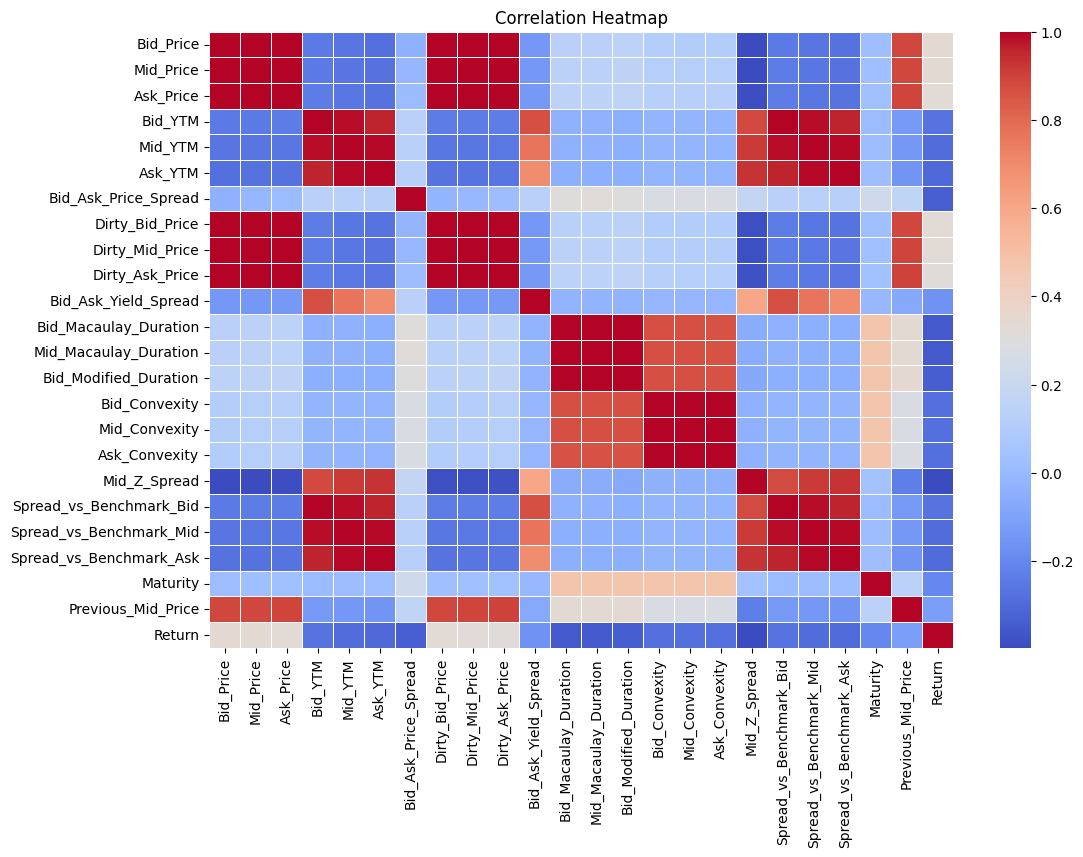

In [ ]:
corr_matrix = numeric_bond_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5 )
plt.title('Correlation Heatmap')
plt.show()

## PCA and clustering

In [ ]:
numeric_bond_data.T

,0,1,2,3,4,5,6,7,8,9,...,29722,29723,29724,29725,29726,29727,29728,29729,29730,29731
ISIN,AU0000002073,XS2100005771,XS2100001192,KZ2C00003051,KZ2C00003002,KZ2C00002475,XS2210006339,XS2210002189,USU71000AD25,USU71000AH39,...,CA44889ZBQ87,CA44889ZDA18,CA44889ZCN48,CA44889ZDZ68,CA44889ZCK09,CA44889ZBX39,CA44889ZCE49,CA44889ZET99,CA44889ZBU99,CA66989ZEG96
Bid_Price,101.27922,14.12656,97.79,85.50855,86.17503,91.2481,70.0,74.71775,100.83144,100.96937,...,85.83701,145.59286,135.16462,111.66734,121.84502,75.912,67.02671,98.35276,80.13028,102.40605
Mid_Price,101.32972,14.45781,97.815,85.64425,86.29733,91.33168,71.365,75.45521,100.83936,100.98512,...,85.91897,146.20178,135.24504,111.76724,122.04181,76.02661,67.16029,98.48908,80.23067,102.53908
Ask_Price,101.38022,14.78906,97.84,85.78021,86.41985,91.41535,72.73,76.19267,100.84728,101.00086,...,86.00102,146.81424,135.32553,111.86726,122.23897,76.14141,67.29416,98.62561,80.3312,102.67236
Bid_YTM,1.39587,556.43932,2.53994,15.38859,14.41116,14.79078,1.87531,2.79544,1.72318,2.98375,...,2.93435,3.44221,3.36471,2.79453,2.92514,3.18848,3.31147,2.82251,3.08934,3.38975
Mid_YTM,1.34106,545.58401,2.53086,15.32251,14.35008,14.73188,1.79969,2.75475,1.69392,2.96347,...,2.91575,3.41605,3.35975,2.75696,2.89654,3.17075,3.29472,2.79231,3.07161,3.38377
Ask_YTM,1.28629,535.10335,2.52179,15.25643,14.289,14.67298,1.72564,2.71454,1.66465,2.94318,...,2.89714,3.38989,3.35479,2.71938,2.86794,3.15302,3.27798,2.76211,3.05388,3.37779
Bid_Ask_Price_Spread,0.101,0.6625,0.05,0.27166,0.24482,0.16725,2.73,1.47492,0.01585,0.03149,...,0.16401,1.22138,0.16092,0.19993,0.39395,0.22941,0.26746,0.27285,0.20093,0.26631
Dirty_Bid_Price,101.50168,16.75469,97.90027,86.50855,88.34303,93.3731,70.34384,74.96015,101.96894,101.89021,...,85.83701,146.40501,135.97677,114.75435,122.95828,75.912,67.02671,98.58013,80.13028,103.60468
Dirty_Mid_Price,101.55218,17.08594,97.92527,86.64425,88.46533,93.45668,71.70884,75.69761,101.97686,101.90595,...,85.91897,147.01393,136.0572,114.85426,123.15507,76.02661,67.16029,98.71645,80.23067,103.73771


In [ ]:
print(numeric_bond_data.columns)

Index(['ISIN', 'Bid_Price', 'Mid_Price', 'Ask_Price', 'Bid_YTM', 'Mid_YTM',
       'Ask_YTM', 'Bid_Ask_Price_Spread', 'Dirty_Bid_Price', 'Dirty_Mid_Price',
       'Dirty_Ask_Price', 'Bid_Ask_Yield_Spread', 'Bid_Macaulay_Duration',
       'Mid_Macaulay_Duration', 'Bid_Modified_Duration', 'Bid_Convexity',
       'Mid_Convexity', 'Ask_Convexity', 'Mid_Z_Spread',
       'Spread_vs_Benchmark_Bid', 'Spread_vs_Benchmark_Mid',
       'Spread_vs_Benchmark_Ask', 'Maturity', 'Previous_Mid_Price', 'Return'],
      dtype='object')


In [ ]:
col_names = [
    'ISIN', 'Bid_Price', 'Mid_Price', 'Ask_Price', 'Bid_YTM', 'Mid_YTM',
       'Ask_YTM', 'Bid_Ask_Price_Spread', 'Dirty_Bid_Price', 'Dirty_Mid_Price',
       'Dirty_Ask_Price', 'Bid_Ask_Yield_Spread', 'Bid_Macaulay_Duration',
       'Mid_Macaulay_Duration', 'Bid_Modified_Duration', 'Bid_Convexity',
       'Mid_Convexity', 'Ask_Convexity', 'Mid_Z_Spread',
       'Spread_vs_Benchmark_Bid', 'Spread_vs_Benchmark_Mid',
       'Spread_vs_Benchmark_Ask', 'Maturity', 'Previous_Mid_Price', 'Return'
]

feats = numeric_bond_data[col_names].copy().dropna().reset_index(drop=True)

feats.T

,0,1,2,3,4,5,6,7,8,9,...,29110,29111,29112,29113,29114,29115,29116,29117,29118,29119
ISIN,AU0000002073,XS2100005771,XS2100001192,KZ2C00003051,KZ2C00003002,KZ2C00002475,XS2210006339,XS2210002189,USU71000AD25,USU71000AH39,...,CA44889ZBQ87,CA44889ZDA18,CA44889ZCN48,CA44889ZDZ68,CA44889ZCK09,CA44889ZBX39,CA44889ZCE49,CA44889ZET99,CA44889ZBU99,CA66989ZEG96
Bid_Price,101.27922,14.12656,97.79,85.50855,86.17503,91.2481,70.0,74.71775,100.83144,100.96937,...,85.83701,145.59286,135.16462,111.66734,121.84502,75.912,67.02671,98.35276,80.13028,102.40605
Mid_Price,101.32972,14.45781,97.815,85.64425,86.29733,91.33168,71.365,75.45521,100.83936,100.98512,...,85.91897,146.20178,135.24504,111.76724,122.04181,76.02661,67.16029,98.48908,80.23067,102.53908
Ask_Price,101.38022,14.78906,97.84,85.78021,86.41985,91.41535,72.73,76.19267,100.84728,101.00086,...,86.00102,146.81424,135.32553,111.86726,122.23897,76.14141,67.29416,98.62561,80.3312,102.67236
Bid_YTM,1.39587,556.43932,2.53994,15.38859,14.41116,14.79078,1.87531,2.79544,1.72318,2.98375,...,2.93435,3.44221,3.36471,2.79453,2.92514,3.18848,3.31147,2.82251,3.08934,3.38975
Mid_YTM,1.34106,545.58401,2.53086,15.32251,14.35008,14.73188,1.79969,2.75475,1.69392,2.96347,...,2.91575,3.41605,3.35975,2.75696,2.89654,3.17075,3.29472,2.79231,3.07161,3.38377
Ask_YTM,1.28629,535.10335,2.52179,15.25643,14.289,14.67298,1.72564,2.71454,1.66465,2.94318,...,2.89714,3.38989,3.35479,2.71938,2.86794,3.15302,3.27798,2.76211,3.05388,3.37779
Bid_Ask_Price_Spread,0.101,0.6625,0.05,0.27166,0.24482,0.16725,2.73,1.47492,0.01585,0.03149,...,0.16401,1.22138,0.16092,0.19993,0.39395,0.22941,0.26746,0.27285,0.20093,0.26631
Dirty_Bid_Price,101.50168,16.75469,97.90027,86.50855,88.34303,93.3731,70.34384,74.96015,101.96894,101.89021,...,85.83701,146.40501,135.97677,114.75435,122.95828,75.912,67.02671,98.58013,80.13028,103.60468
Dirty_Mid_Price,101.55218,17.08594,97.92527,86.64425,88.46533,93.45668,71.70884,75.69761,101.97686,101.90595,...,85.91897,147.01393,136.0572,114.85426,123.15507,76.02661,67.16029,98.71645,80.23067,103.73771


In [ ]:
scaled = StandardScaler().fit_transform(feats.iloc[:, 1:])
pca = PCA(n_components=3).fit_transform(scaled)


In [ ]:
thresh = 0.85
pcatest = PCA(0.85).fit_transform(scaled)
rows = pcatest.shape[1]
print(f"We explain {100*thresh}% of the data with {rows} components")

We explain 85.0% of the data with 3 components


In [ ]:
scores = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    clusters = kmeans.fit(scaled)
    scores.append([i, clusters.inertia_])

In [ ]:
pd.DataFrame(scores, columns=["#cluster", "score"]).plot(x="#cluster", y="score")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': '#cluster=%{x}<br>score=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': 'AgMEBQYHCAk=', 'dtype': 'i1'},
              'xaxis': 'x',
              'y': {'bdata': ('0+5bNiAiIUE2o9GPT9YZQRlCK2Gcjx' ... 'bNxApBjeq4Zf1kCEHANCBvCHcHQQ=='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': '#cluster'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'score'}}}
})

We see 6 is good on the elbow plot.

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit(scaled)


In [ ]:
pd.Series(clusters.labels_).value_counts()


1    22822
4     3367
5     2299
0      600
3       30
2        2
Name: count, dtype: int64

In [ ]:
viz_data = pd.DataFrame(pca, columns=["x", "y", "z"])
viz_data["c"] = clusters.labels_
viz_data["ISIN"] = feats["ISIN"]
viz_data = viz_data.merge(feats, on="ISIN", how="left")


In [ ]:
viz_data

,x,y,z,c,ISIN,Bid_Price,Mid_Price,Ask_Price,Bid_YTM,Mid_YTM,...,Bid_Convexity,Mid_Convexity,Ask_Convexity,Mid_Z_Spread,Spread_vs_Benchmark_Bid,Spread_vs_Benchmark_Mid,Spread_vs_Benchmark_Ask,Maturity,Previous_Mid_Price,Return
0,0.118809,-1.856248,0.910447,1,AU0000002073,101.27922,101.32972,101.38022,1.39587,1.34106,...,1.34876,1.34950,1.35024,18.81055,31.59785,28.98544,26.37600,340,102.68527,-0.013201
1,30.143905,6.874261,2.965781,0,XS2100005771,14.12656,14.45781,14.78906,556.43932,545.58401,...,0.06949,0.07165,0.07383,26027.20629,55401.51907,54316.41442,53268.77474,283,23.98490,-0.397212
2,0.411992,-1.452893,0.170630,1,XS2100001192,97.79000,97.81500,97.84000,2.53994,2.53086,...,10.91304,10.91501,10.91698,-18.84973,6.52663,7.06693,7.60755,1077,100.66900,-0.028350
3,2.114996,-1.930232,-1.069078,1,KZ2C00003051,85.50855,85.64425,85.78021,15.38859,15.32251,...,7.41820,7.42393,7.42966,196.48291,415.61786,410.61786,405.61786,1061,87.42832,-0.020406
4,1.954916,-1.777540,-0.951792,1,KZ2C00003002,86.17503,86.29733,86.41985,14.41116,14.35008,...,7.16790,7.17297,7.17805,106.55136,317.87473,313.37473,308.87473,1003,92.32912,-0.065329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29115,2.715828,-0.987631,-3.321035,1,CA44889ZBX39,75.91200,76.02661,76.14141,3.18848,3.17075,...,1.88461,1.88267,1.88073,23.22863,75.99052,74.49052,72.99052,3212,82.52354,-0.078728
29116,3.580758,-0.543466,-4.903649,1,CA44889ZCE49,67.02671,67.16029,67.29416,3.31147,3.29472,...,0.77720,0.77594,0.77469,28.98933,83.04627,81.54627,80.04627,4489,74.63534,-0.100154
29117,0.209008,-0.713315,-0.047504,1,CA44889ZET99,98.35276,98.48908,98.62561,2.82251,2.79231,...,24.37052,24.37933,24.38813,-7.57722,38.86651,36.36651,33.86651,1796,105.13957,-0.063254
29118,2.299586,-1.171014,-2.587126,1,CA44889ZBU99,80.13028,80.23067,80.33120,3.08934,3.07161,...,0.65331,0.65275,0.65218,16.44649,66.07623,64.57623,63.07623,2663,86.39647,-0.071366


In [ ]:
viz_data.groupby("c")[[
    'Bid_Price', 'Mid_Price', 'Ask_Price', 'Bid_YTM', 'Mid_YTM',
       'Ask_YTM', 'Bid_Ask_Price_Spread', 'Dirty_Bid_Price', 'Dirty_Mid_Price',
       'Dirty_Ask_Price', 'Bid_Ask_Yield_Spread', 'Bid_Macaulay_Duration',
       'Mid_Macaulay_Duration', 'Bid_Modified_Duration', 'Bid_Convexity',
       'Mid_Convexity', 'Ask_Convexity', 'Mid_Z_Spread',
       'Spread_vs_Benchmark_Bid', 'Spread_vs_Benchmark_Mid',
       'Spread_vs_Benchmark_Ask', 'Maturity', 'Previous_Mid_Price', 'Return'
]].mean().T


c,0,1,2,3,4,5
Bid_Price,39.272646,98.573845,5.000000,12.958896,122.788626,96.715071
Mid_Price,40.037263,98.733698,7.500000,14.073316,123.190716,97.109269
Ask_Price,40.801913,98.893714,10.000000,15.190499,123.594773,97.505780
Bid_YTM,64.563727,3.568975,5933.141210,1243.956807,3.446347,3.620586
Mid_YTM,61.811814,3.487075,4175.156140,1037.780255,3.411310,3.594572
Ask_YTM,59.643915,3.406104,3181.097230,942.915824,3.376515,3.568678
Bid_Ask_Price_Spread,1.529268,0.319870,5.000000,2.231602,0.806147,0.790708
Dirty_Bid_Price,40.499611,99.506791,6.506250,15.314586,124.367692,97.577713
Dirty_Mid_Price,41.264228,99.666644,9.006250,16.429006,124.769782,97.971911
Dirty_Ask_Price,42.028878,99.826660,11.506250,17.546188,125.173839,98.368422


In [ ]:
fig = px.scatter_3d(viz_data, x="x", y="y", z="z", color="c", size_max=10, opacity=0.8)
fig.update_traces(marker_size=6)
fig.show(renderer="browser")

## non-numeric columns

In [ ]:
# get non numeric columns
non_numeric_columns = bond_data.select_dtypes(exclude=["number"]).columns
print(non_numeric_columns)

# analysis on non numeric columns

# get counts for each non numeric column
non_numeric_counts = bond_data[non_numeric_columns].nunique()
print(f"Non numeric column counts: {non_numeric_counts}")
